In [2]:
# %load preload.py

from matplotlib import rc

import matplotlib.pyplot as plt
from numpy import *
from control import *
from scipy.linalg import *
from sympy.solvers.solveset import linsolve
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
# from sympy import Matrix, symbols, sin, cos, tan, asin, acos, atan, simplify
from scipy.integrate import solve_ivp

plt.rc('axes',axisbelow=True)
rc('text', usetex=True)
init_vprinting()


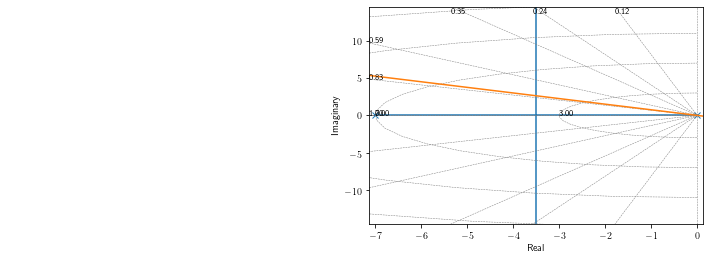

In [3]:
F = tf(6.7713,poly([0,-7]))
x = linspace(-10,10,10000)
r, k = root_locus(F)
damping_ratio = tan(pi-arccos(.7998396910782286)) * x
plt.plot(x, damping_ratio)
plt.savefig('root.png',dpi=600)

In [4]:
drline = asarray(x,dtype=complex)
drline.imag = damping_ratio

In [6]:
step_info(F)

{'RiseTime': 5.486486486486486,
 'SettlingTime': 6.866866866866867,
 'SettlingMin': 5.975636630508071,
 'SettlingMax': 6.633110204081629,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 6.633110204081629,
 'PeakTime': 7.0,
 'SteadyStateValue': 6.633110204081629}

In [10]:
import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go

# Filter requirements.
T = 5.0         # Sample Period
fs = 60.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

data = np.loadtxt('a.txt')

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
# plt.plot(data,'b-')
# plt.plot(y,'r-')
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()